**Universidad de Los Andes - Facultad de Economía**  <br>
**Econometría y el Aprendizaje de las Máquinas** <br>
**Julio 10 de 2019**


# TALLER 2 <br>

**Integrantes del grupo:**

- Sebastián Castro 
- Stefany Moreno
- Paola Poveda
- Miguel Angel Suarez

## Punto 1

1. Construya un modelo OLS para predecir la inflación en Colombia utilizando rezagos de la inflación colombiana, así como rezagos de la inflación de precios web (PriceStats) como variables predictoras. Tenga en cuenta el componente de estacionalidad (i.e variables dicotómicas por mes). Utilice como métrica de desempeño el RMSE. Interprete todo lo que pueda el modelo (errores, coeficientes, métricas de desempeño).

In [1]:
# cargar librerias
#%pylab inline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.image as mpimg
import sklearn.datasets as da
import pandas as pd # Procesamiento de datos
import numpy as np # Arreglos númericos
from matplotlib import pyplot as plt # Gráficos
import matplotlib.pylab as plt1
from itertools import chain
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import math
from sklearn.metrics import make_scorer # Utilidades de evaluación
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer  # Utilidades de  Preprocesamiento
from sklearn.pipeline import Pipeline          # Utilidades de  Preprocesamiento
from sklearn.preprocessing import StandardScaler, OneHotEncoder #Estandarización y dummies
from sklearn.model_selection import train_test_split, GridSearchCV # Partición de datos, validación cruzada
import sklearn.metrics as metrics  # Métricas de desempeño
from __future__ import print_function
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import seaborn as sns
import statsmodels.api as sm
import plotly.plotly as py
import plotly.graph_objs as go

In [2]:
ipctr = pd.read_excel('Inflacion_Colombia_va.xlsx', sheet_name='Train')
ipctr.shape

(2708, 65)

In [3]:
ipcte = pd.read_excel('Inflacion_Colombia_va.xlsx', sheet_name='Test')
ipcte.shape

(1096, 65)

In [47]:
trace_high = go.Scatter(
                x=ipctr.date,
                y=ipctr['targetof'],
                name = "Official",
                line = dict(color = '#17BECF'),
                opacity = 0.8)

trace_low = go.Scatter(
                x=ipctr.date,
                y=ipctr['targeton'],
                name = "Online",
                line = dict(color = '#7F7F7F'),
                opacity = 0.8)

data = [trace_high,trace_low]

layout = dict(
    title = "Official vs WebPrices Train data",
    xaxis = dict(
        range = ['01/02/2009','01/07/2016'])
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename = "Official vs Online Train data")

In [48]:
trace_high = go.Scatter(
                x=ipcte.date,
                y=ipcte['targetof'],
                name = "Official",
                line = dict(color = '#17BECF'),
                opacity = 0.8)

trace_low = go.Scatter(
                x=ipcte.date,
                y=ipcte['targeton'],
                name = "Online",
                line = dict(color = '#7F7F7F'),
                opacity = 0.8)

data = [trace_high,trace_low]

layout = dict(
    title = "Official vs WebPrices Test data",
    xaxis = dict(
        range = ['02/07/2016','02/07/2019'])
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename = "Official vs Online Test set")

### Modelo con un rezago de la variable de inflación oficial mensual

C:\Users\Stefany\Anaconda2\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



                            OLS Regression Results                            
Dep. Variable:               targetof   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     314.2
Date:                Wed, 10 Jul 2019   Prob (F-statistic):               0.00
Time:                        18:27:50   Log-Likelihood:                 13419.
No. Observations:                2649   AIC:                        -2.678e+04
Df Residuals:                    2621   BIC:                        -2.662e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0011      0.000     -9.010      0.0

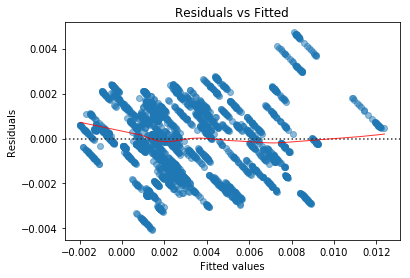

In [6]:
## Modelo Rezago 1 Mes

## Train and test set
X_train1 = ipctr.iloc[:,[5,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,40,41,42,43]].dropna() 
X_test1 = ipcte.iloc[:1065,[5,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,40,41,42,43]].dropna()
Y_train1 = ipctr.iloc[59:,3].dropna()
Y_test1 = ipcte.iloc[:,3].dropna()

## OLS with statsmodels
model1 = sm.OLS(Y_train1, sm.add_constant(X_train1))
model1_fit = model1.fit()

# create dataframe from X, y for easier plot handling
dataframe = pd.concat([X_train1, Y_train1], axis=1)

# Predicted
model1_pred = model1_fit.predict(sm.add_constant(X_test1))

# model values
model1_fitted_y = model1_fit.fittedvalues

# plot
plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model1_fitted_y, dataframe.columns[-1], data=dataframe,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

print(model1_fit.summary())
print('\n')
print('Coeficientes con libreria Scikit')


## OLS with scikit

# crear modelo de RL
lr1 = LinearRegression()

# entrenar el modelo con los datos de entrenamiento
lr1.fit(X_train1, Y_train1)

# predecir los precios para la base de prueba
Y_pred_lr1 = lr1.predict(X_test1)

# Coeficientes
names= X_train1.columns
coef_lr1= lr1.coef_
coeficientes_lr1= pd.DataFrame(coef_lr1, index=names)
coeficientes_lr1.columns=["1 lag"]
print(coeficientes_lr1)
print('\n')

#RMSE
mse_lr1 = mean_squared_error(Y_test1, model1_pred)
print('MSE: {}'.format(mse_lr1))
rmse_lr1 = math.sqrt(mse_lr1)
print('RMSE: {}'.format(rmse_lr1))
print('Training score: {}'.format(lr1.score(X_train1, Y_train1)))
print('Test score: {}'.format(lr1.score(X_test1, Y_test1)))
print('Variance: {}'.format(np.var(Y_pred_lr1)))

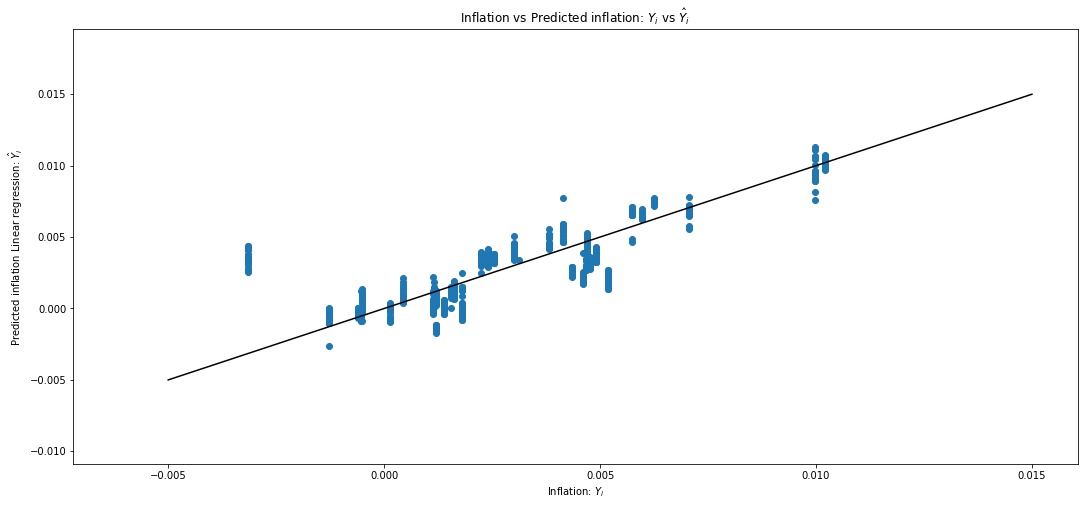

In [7]:
# Modelo 1 Rezago 1 mes
plt.rcParams["figure.figsize"] = [18.0, 8.0]
plt.scatter(Y_test1, Y_pred_lr1)
plt.xlabel("Inflation: $Y_i$")
plt.ylabel("Predicted inflation Linear regression: $\hat{Y}_i$")
plt.title("Inflation vs Predicted inflation: $Y_i$ vs $\hat{Y}_i$")
plt.plot([-0.005,0.015],[-0.005,0.015],color="black")
plt.show()

In [8]:
trace_high = go.Scatter(
                x=ipcte.date,
                y=Y_test1,
                name = "Inflation Official",
                line = dict(color = '#17BECF'),
                opacity = 0.8)

trace_low = go.Scatter(
                x=ipcte.date,
                y=Y_pred_lr1,
                name = "Predicted inflation",
                line = dict(color = '#7F7F7F'),
                opacity = 0.8)

data = [trace_high,trace_low]

layout = dict(
    title = "Inflation vs Predicted inflation: OLS one lag",
    xaxis = dict(
        range = ['02/07/2016','02/07/2019'])
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename = "OLS 1 lag")

### Modelo con tres rezagos de la variable de inflación oficial mensual

                            OLS Regression Results                            
Dep. Variable:               targetof   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     287.5
Date:                Wed, 10 Jul 2019   Prob (F-statistic):               0.00
Time:                        18:27:58   Log-Likelihood:                 13092.
No. Observations:                2588   AIC:                        -2.612e+04
Df Residuals:                    2558   BIC:                        -2.595e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0012      0.000     -9.317      0.0

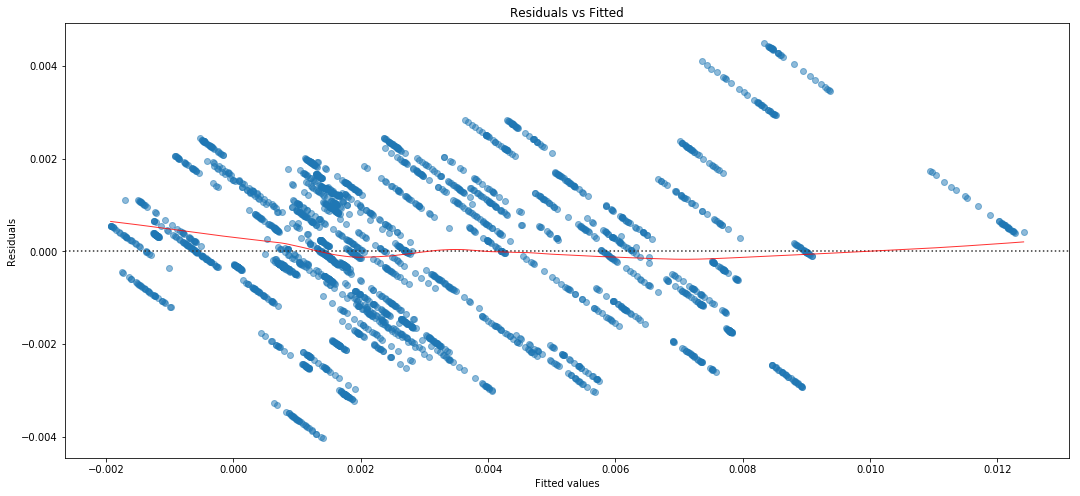

In [9]:
## Modelo Rezago 3 Meses

X_train3 = ipctr.iloc[:,[5,6,7,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,40,41,42,43]].dropna() 
X_test3 = ipcte.iloc[:1065,[5,6,7,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,40,41,42,43]].dropna()
Y_train3 = ipctr.iloc[120:,3].dropna()
Y_test3 = ipcte.iloc[:,3].dropna()

## OLS with statsmodels
model2 = sm.OLS(Y_train3, sm.add_constant(X_train3))
model2_fit = model2.fit()

# create dataframe from X, y for easier plot handling
dataframe = pd.concat([X_train3, Y_train3], axis=1)

# Predicted
model2_pred = model2_fit.predict(sm.add_constant(X_test3))

# model values
model2_fitted_y = model2_fit.fittedvalues

plot_lm_2 = plt.figure()
plot_lm_2.axes[0] = sns.residplot(model2_fitted_y, dataframe.columns[-1], data=dataframe,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_2.axes[0].set_title('Residuals vs Fitted')
plot_lm_2.axes[0].set_xlabel('Fitted values')
plot_lm_2.axes[0].set_ylabel('Residuals');

print(model2_fit.summary())
print('\n')
print('Coeficientes con libreria Scikit')

## OLS with scikit

# crear modelo de RL
lr2 = LinearRegression()

# entrenar el modelo con los datos de entrenamiento
lr2.fit(X_train3, Y_train3)

# predecir los precios para la base de prueba
Y_pred_lr2 = lr2.predict(X_test3)

# Coeficientes
names= X_train3.columns
coef_lr2= lr2.coef_
coeficientes_lr2= pd.DataFrame(coef_lr2, index=names)
coeficientes_lr2.columns=["3 lags"]
print(coeficientes_lr2)
print('\n')
#RMSE
mse_lr2 = mean_squared_error(Y_test3, model2_pred)
print('MSE: {}'.format(mse_lr2))
rmse_lr2 = math.sqrt(mse_lr2)
print('RMSE: {}'.format(rmse_lr2))
print('Training score: {}'.format(lr2.score(X_train3, Y_train3)))
print('Test score: {}'.format(lr2.score(X_test3, Y_test3)))
print('Variance: {}'.format(np.var(Y_pred_lr2)))

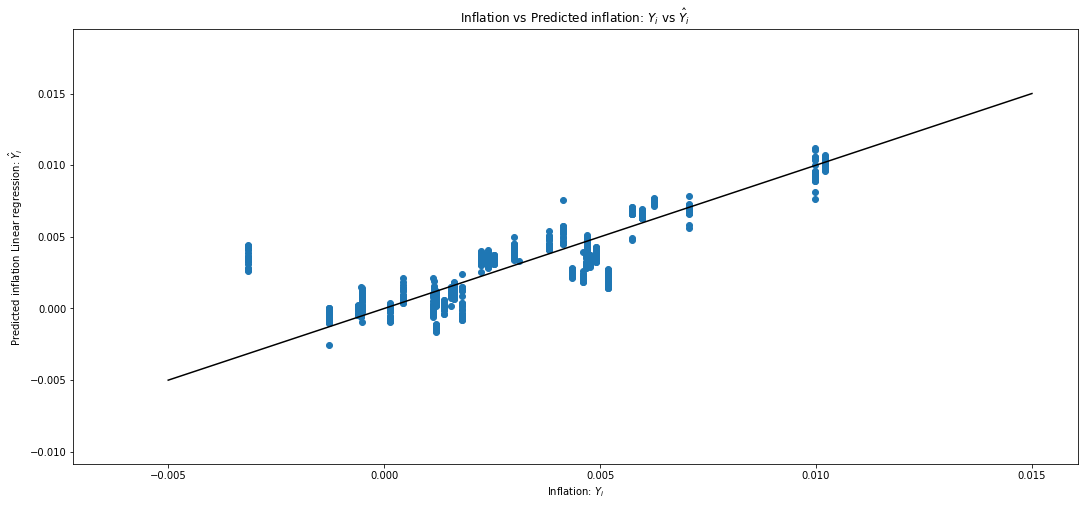

In [10]:
# Modelo 2 Rezago 3 meses
plt.rcParams["figure.figsize"] = [18.0, 8.0]
plt.scatter(Y_test3, Y_pred_lr2)
plt.xlabel("Inflation: $Y_i$")
plt.ylabel("Predicted inflation Linear regression: $\hat{Y}_i$")
plt.title("Inflation vs Predicted inflation: $Y_i$ vs $\hat{Y}_i$")
plt.plot([-0.005,0.015],[-0.005,0.015],color="black")
plt.show()

In [11]:
trace_high = go.Scatter(
                x=ipcte.date,
                y=Y_test3,
                name = "Inflation Official",
                line = dict(color = '#17BECF'),
                opacity = 0.8)

trace_low = go.Scatter(
                x=ipcte.date,
                y=Y_pred_lr2,
                name = "Predicted inflation",
                line = dict(color = '#7F7F7F'),
                opacity = 0.8)

data = [trace_high,trace_low]

layout = dict(
    title = "Inflation vs Predicted inflation: OLS 3 lags",
    xaxis = dict(
        range = ['02/07/2016','02/07/2019'])
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename = "OLS 3 lags")

## Modelo con seis rezagos de la variable de inflación oficial mensual

                            OLS Regression Results                            
Dep. Variable:               targetof   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     259.2
Date:                Wed, 10 Jul 2019   Prob (F-statistic):               0.00
Time:                        18:28:06   Log-Likelihood:                 12663.
No. Observations:                2496   AIC:                        -2.526e+04
Df Residuals:                    2463   BIC:                        -2.507e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0020      0.000    -11.651      0.0

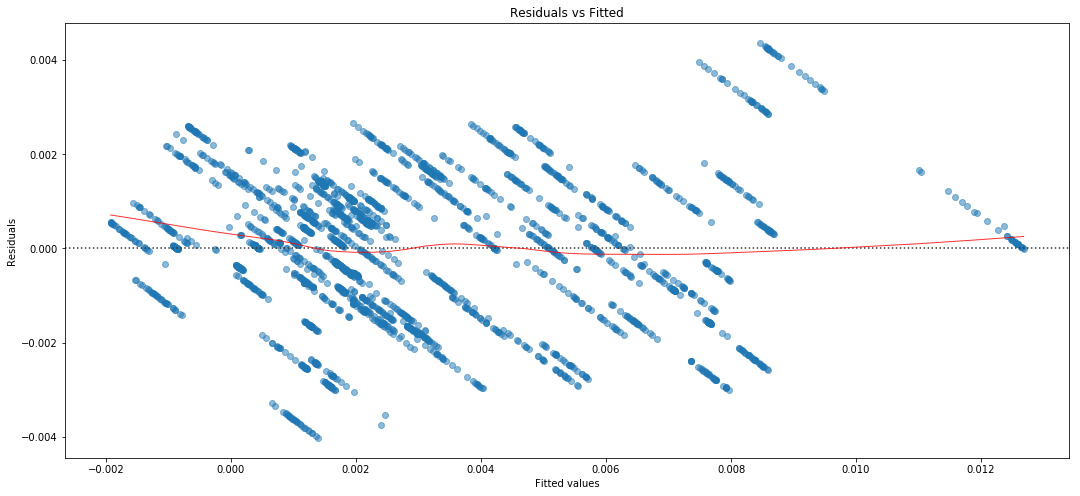

In [12]:
## Modelo Rezago 6 Meses

X_train6 = ipctr.iloc[:,[5,6,7,8,9,10,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,40,41,42,43]].dropna() 
X_test6 = ipcte.iloc[:1065,[5,6,7,8,9,10,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,40,41,42,43]].dropna()
Y_train6 = ipctr.iloc[212:,3].dropna()
Y_test6 = ipcte.iloc[:,3].dropna()

## OLS with statsmodels

model3 = sm.OLS(Y_train6, sm.add_constant(X_train6))
model3_fit = model3.fit()

# create dataframe from X, y for easier plot handling
dataframe = pd.concat([X_train6, Y_train6], axis=1)

# Predicted
model3_pred = model3_fit.predict(sm.add_constant(X_test6))

# model values
model3_fitted_y = model3_fit.fittedvalues

plot_lm_3 = plt.figure()
plot_lm_3.axes[0] = sns.residplot(model3_fitted_y, dataframe.columns[-1], data=dataframe,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Residuals vs Fitted')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('Residuals');

print(model3_fit.summary())
print('\n')
print('Coeficientes con libreria Scikit')

## OLS with scikit

# crear modelo de RL
lr3 = LinearRegression()

# entrenar el modelo con los datos de entrenamiento
lr3.fit(X_train6, Y_train6)

# predecir los precios para la base de prueba
Y_pred_lr3 = lr3.predict(X_test6)

# Coeficientes
names= X_train6.columns
coef_lr3= lr3.coef_
coeficientes_lr3= pd.DataFrame(coef_lr3, index=names)
coeficientes_lr3.columns=["6 lags"]
print(coeficientes_lr3)
print('\n')
#RMSE
mse_lr3 = mean_squared_error(Y_test6, model3_pred)
print('MSE: {}'.format(mse_lr3))
rmse_lr3 = math.sqrt(mse_lr3)
print('RMSE: {}'.format(rmse_lr3))
print('Training score: {}'.format(lr3.score(X_train6, Y_train6)))
print('Test score: {}'.format(lr3.score(X_test6, Y_test6)))
print('Variance: {}'.format(np.var(Y_pred_lr3)))

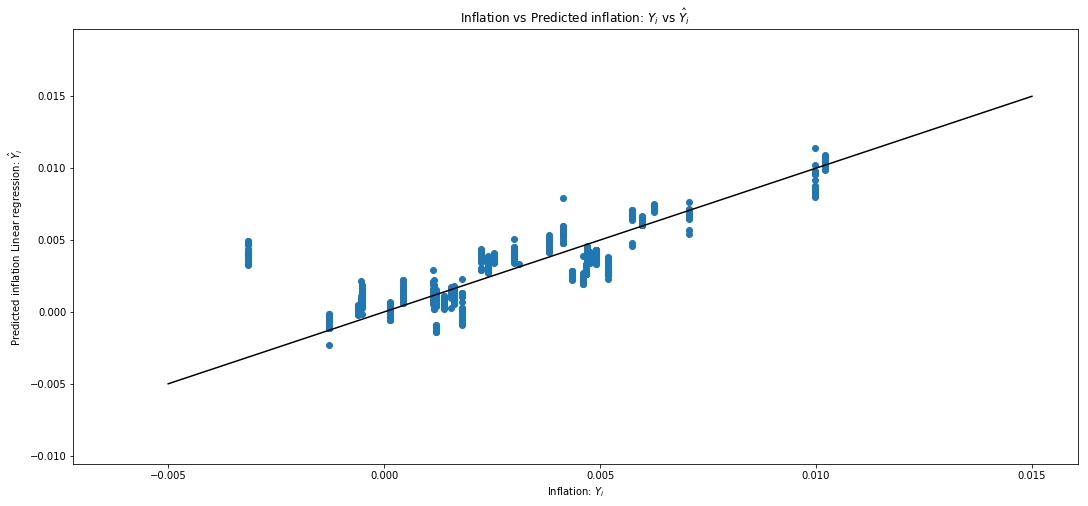

In [13]:
# Modelo 3 Rezago 6 meses
plt.rcParams["figure.figsize"] = [18.0, 8.0]
plt.scatter(Y_test6, Y_pred_lr3)
plt.xlabel("Inflation: $Y_i$")
plt.ylabel("Predicted inflation Linear regression: $\hat{Y}_i$")
plt.title("Inflation vs Predicted inflation: $Y_i$ vs $\hat{Y}_i$")
plt.plot([-0.005,0.015],[-0.005,0.015],color="black")
plt.show()

In [14]:
trace_high = go.Scatter(
                x=ipcte.date,
                y=Y_test6,
                name = "Inflation Official",
                line = dict(color = '#17BECF'),
                opacity = 0.8)

trace_low = go.Scatter(
                x=ipcte.date,
                y=Y_pred_lr3,
                name = "Predicted inflation",
                line = dict(color = '#7F7F7F'),
                opacity = 0.8)

data = [trace_high,trace_low]

layout = dict(
    title = "Inflation vs Predicted inflation: OLS 6 lags",
    xaxis = dict(
        range = ['02/07/2016','02/07/2019'])
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename = "OLS 6 lags")

### Modelo con 12 rezagos de la variable de inflación oficial mensual

                            OLS Regression Results                            
Dep. Variable:               targetof   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     256.9
Date:                Wed, 10 Jul 2019   Prob (F-statistic):               0.00
Time:                        18:28:13   Log-Likelihood:                 11996.
No. Observations:                2315   AIC:                        -2.391e+04
Df Residuals:                    2276   BIC:                        -2.369e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0024      0.000    -14.035      0.0

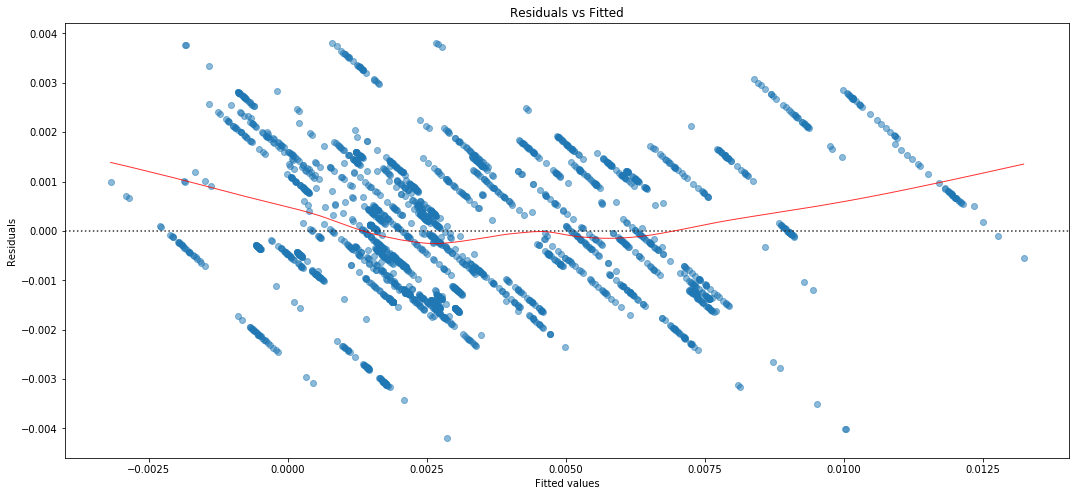

In [15]:
## Modelo Rezago 12 Meses

X_train12 = ipctr.iloc[:,[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,40,41,42,43]].dropna() 
X_test12 = ipcte.iloc[:1065,[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,40,41,42,43]].dropna()
Y_train12 = ipctr.iloc[393:,3].dropna()
Y_test12 = ipcte.iloc[:,3].dropna()

## OLS with statsmodels

model4 = sm.OLS(Y_train12, sm.add_constant(X_train12))
model4_fit = model4.fit()

# create dataframe from X, y for easier plot handling
dataframe = pd.concat([X_train12, Y_train12], axis=1)

# Predicted
model4_pred = model4_fit.predict(sm.add_constant(X_test12))

# model values
model4_fitted_y = model4_fit.fittedvalues

plot_lm_4 = plt.figure()
plot_lm_4.axes[0] = sns.residplot(model4_fitted_y, dataframe.columns[-1], data=dataframe,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_title('Residuals vs Fitted')
plot_lm_4.axes[0].set_xlabel('Fitted values')
plot_lm_4.axes[0].set_ylabel('Residuals');

print(model4_fit.summary())
print('\n')
print('Coeficientes con libreria Scikit')

## OLS with scikit

# crear modelo de RL
lr4 = LinearRegression()

# entrenar el modelo con los datos de entrenamiento
lr4.fit(X_train12, Y_train12)

# predecir los precios para la base de prueba
Y_pred_lr4 = lr4.predict(X_test12)

# Coeficientes
names= X_train12.columns
coef_lr4= lr4.coef_
coeficientes_lr4= pd.DataFrame(coef_lr4, index=names)
coeficientes_lr4.columns=["12 lags"]
print(coeficientes_lr4)
print('\n')
#RMSE
mse_lr4 = mean_squared_error(Y_test12, model4_pred)
print('MSE: {}'.format(mse_lr4))
rmse_lr4 = math.sqrt(mse_lr4)
print('RMSE: {}'.format(rmse_lr4))
print('Training score: {}'.format(lr4.score(X_train12, Y_train12)))
print('Test score: {}'.format(lr4.score(X_test12, Y_test12)))
print('Variance: {}'.format(np.var(Y_pred_lr4)))

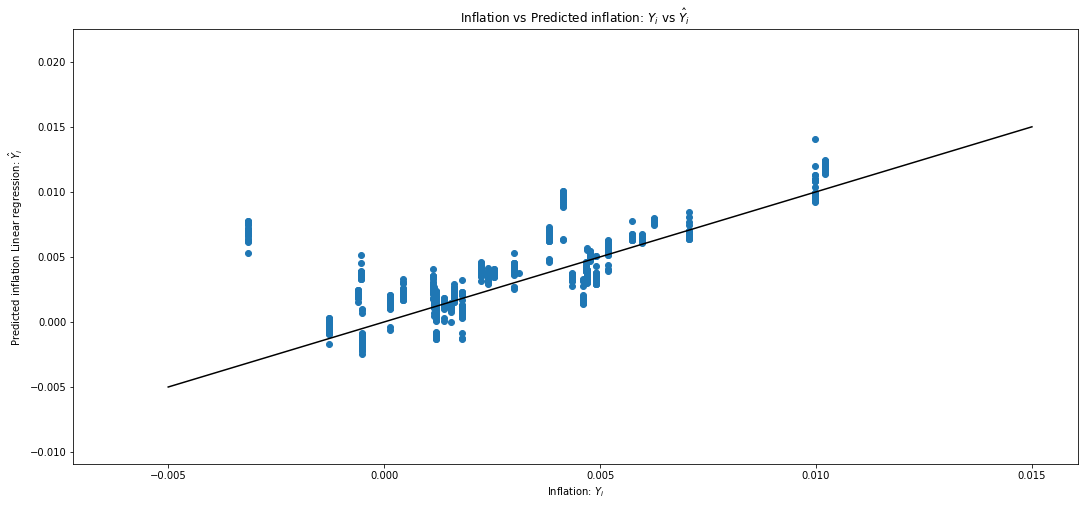

In [16]:
# Modelo 4 Rezago 12 meses
plt.rcParams["figure.figsize"] = [18.0, 8.0]
plt.scatter(Y_test12, Y_pred_lr4)
plt.xlabel("Inflation: $Y_i$")
plt.ylabel("Predicted inflation Linear regression: $\hat{Y}_i$")
plt.title("Inflation vs Predicted inflation: $Y_i$ vs $\hat{Y}_i$")
plt.plot([-0.005,0.015],[-0.005,0.015],color="black")
plt.show()

In [17]:
trace_high = go.Scatter(
                x=ipcte.date,
                y=Y_test12,
                name = "Inflation Official",
                line = dict(color = '#17BECF'),
                opacity = 0.8)

trace_low = go.Scatter(
                x=ipcte.date,
                y=Y_pred_lr4,
                name = "Predicted inflation",
                line = dict(color = '#7F7F7F'),
                opacity = 0.8)

data = [trace_high,trace_low]

layout = dict(
    title = "Inflation vs Predicted inflation: OLS 12 lags",
    xaxis = dict(
        range = ['02/07/2016','02/07/2019'])
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename = "OLS 12 lags")

In [18]:
# RMSE all models
print('RMSE 1  lag : {}'.format(rmse_lr1))
print('RMSE 3  lags: {}'.format(rmse_lr2))
print('RMSE 6  lags: {}'.format(rmse_lr3))
print('RMSE 12 lags: {}'.format(rmse_lr4))

RMSE 1  lag : 0.00170079454583
RMSE 3  lags: 0.00168706772602
RMSE 6  lags: 0.001716041393
RMSE 12 lags: 0.00245315077497


## Punto dos

2.. Use un modelo de Machine Learning para predecir la inflación en Colombia. Es posible y se recomienda crear o buscar nuevas variables predictoras que le permitan llegar a mejores pronósticos. Reporte el RMSE. Exponga su proceso para llegar al modelo final (que variables usó, por qué, que otros implementó…)

In [19]:
X_train12_va = ipctr.iloc[:,[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63]].dropna()
X_test12_va = ipcte.iloc[:913,[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63]].dropna()
Y_train12_va = ipctr.iloc[393:,3].dropna()
Y_test12_va = ipcte.iloc[:913,3].dropna()

### Lasso

In [20]:
#Regresion Lasso
lasso = Lasso(random_state=0, max_iter=1000000)

# Grilla de valores para buscar lambda/alpha
parameters = [{'alpha': list(np.linspace(start=0.0000001, stop=0.000001, num=10))}]
n_folds = 3

# Validación cruzada usando accuracy
clf_lasso = GridSearchCV(lasso, parameters, cv=n_folds, iid=False)
clf_lasso.fit(X_train12_va, Y_train12_va)

# Predicción
Y_pred_lasso= clf_lasso.predict(X_test12_va)

In [21]:
# Coeficientes
names= X_train12_va.columns
coef_lasso= clf_lasso.best_estimator_.coef_
coeficientes_lasso= pd.DataFrame(coef_lasso, index=names)
coeficientes_lasso.columns=["Lasso"]
coeficientes_lasso

,Lasso
lag1Mof,0.215381
lag2Mof,-0.000000
lag3Mof,-0.121499
lag4Mof,-0.000000
lag5Mof,-0.000000
lag6Mof,0.026223
lag7Mof,0.000000
lag8Mof,0.000000
lag9Mof,0.027949
lag10Mof,0.000000


In [22]:
#RMSE
mse_lasso = mean_squared_error(Y_test12_va, Y_pred_lasso)
rmse_lasso = math.sqrt(mse_lasso)
print('RMSE: {}'.format(rmse_lasso))
print('Training score: {}'.format(clf_lasso.score(X_train12_va, Y_train12_va)))
print('Test score: {}'.format(clf_lasso.score(X_test12_va, Y_test12_va)))
print('Best parameter: {}'.format(clf_lasso.best_params_))

RMSE: 0.00284531194607
Training score: 0.88603633209
Test score: 0.108339632838
Best parameter: {'alpha': 2e-07}


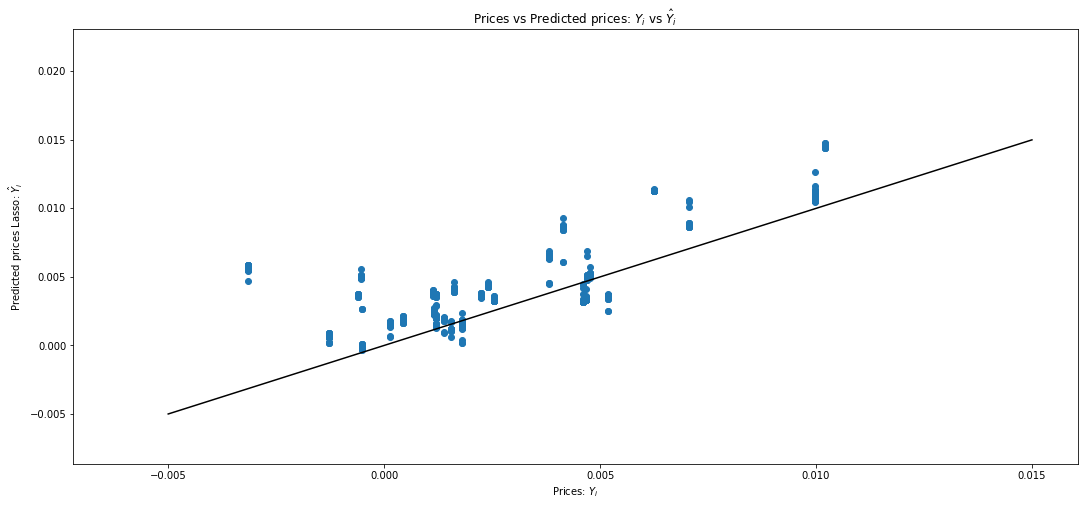

In [23]:
# graficar los precios predecidos vs los precios reales
plt.scatter(Y_test12_va, Y_pred_lasso)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices Lasso: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.plot([-0.005,0.015],[-0.005,0.015],color="black")
plt.show()

In [24]:
trace_high = go.Scatter(
                x=ipcte.date,
                y=Y_test12_va,
                name = "Inflation Official",
                line = dict(color = '#17BECF'),
                opacity = 0.8)

trace_low = go.Scatter(
                x=ipcte.date,
                y=Y_pred_lasso,
                name = "Predicted inflation",
                line = dict(color = '#7F7F7F'),
                opacity = 0.8)

data = [trace_high,trace_low]

layout = dict(
    title = "Inflation vs Predicted inflation: Lasso",
    xaxis = dict(
        range = ['02/07/2016','02/07/2019'])
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename = "Lasso")

## Ridge

In [25]:
#Regresion Ridge
ridge = Ridge(random_state=0, max_iter=10000)

# Grilla de valores para buscar lambda/alpha
parameters = [{'alpha': list(np.linspace(start=0.1, stop=10, num=10))}]
n_folds = 3

# Validación cruzada usando accuracy
clf_ridge = GridSearchCV(ridge, parameters, cv=n_folds, iid=False)
clf_ridge.fit(X_train12_va, Y_train12_va)

# Predicción
Y_pred_ridge= clf_ridge.predict(X_test12_va)

In [26]:
# Coeficientes
names= X_train12_va.columns
coef_ridge= clf_ridge.best_estimator_.coef_
coeficientes_ridge= pd.DataFrame(coef_ridge, index=names)
coeficientes_ridge.columns=["Ridge"]
coeficientes_ridge

,Ridge
lag1Mof,0.000197
lag2Mof,0.000010
lag3Mof,-0.000080
lag4Mof,-0.000061
lag5Mof,-0.000045
lag6Mof,-0.000001
lag7Mof,-0.000009
lag8Mof,-0.000008
lag9Mof,0.000053
lag10Mof,0.000070


In [27]:
#RMSE
mse_ridge = mean_squared_error(Y_test12_va, Y_pred_ridge)
rmse_ridge = math.sqrt(mse_ridge)
print('RMSE: {}'.format(rmse_ridge))
print('Training score: {}'.format(clf_ridge.score(X_train12_va, Y_train12_va)))
print('Test score: {}'.format(clf_ridge.score(X_test12_va, Y_test12_va)))
print('Best parameter: {}'.format(clf_ridge.best_params_)) 

RMSE: 0.00236030101315
Training score: 0.802180071827
Test score: 0.386415366787
Best parameter: {'alpha': 10.0}


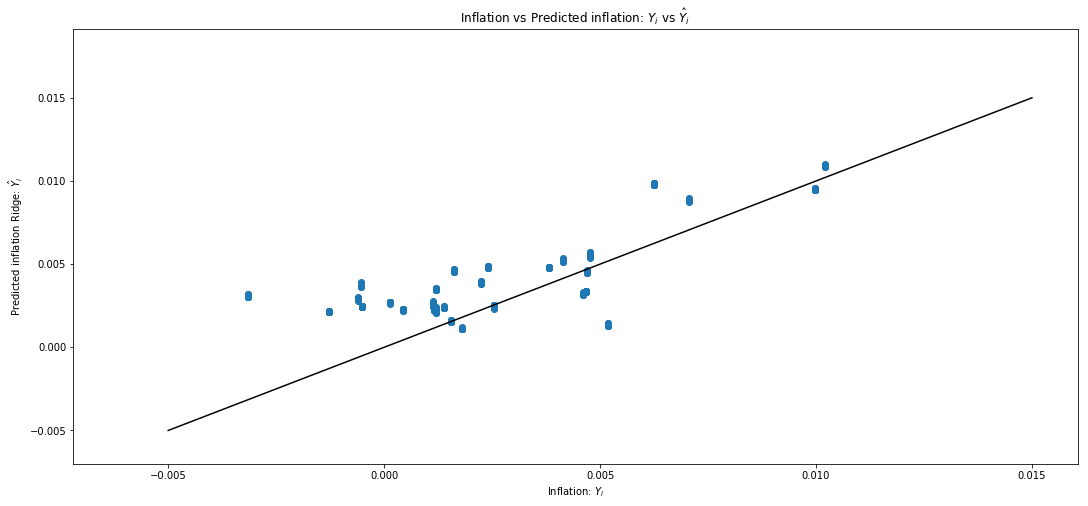

In [28]:
# graficar los precios predecidos vs los precios reales
plt.scatter(Y_test12_va, Y_pred_ridge)
plt.xlabel("Inflation: $Y_i$")
plt.ylabel("Predicted inflation Ridge: $\hat{Y}_i$")
plt.title("Inflation vs Predicted inflation: $Y_i$ vs $\hat{Y}_i$")
plt.plot([-0.005,0.015],[-0.005,0.015],color="black")
plt.show()

In [29]:
trace_high = go.Scatter(
                x=ipcte.date,
                y=Y_test12_va,
                name = "Inflation Official",
                line = dict(color = '#17BECF'),
                opacity = 0.8)

trace_low = go.Scatter(
                x=ipcte.date,
                y=Y_pred_ridge,
                name = "Predicted inflation",
                line = dict(color = '#7F7F7F'),
                opacity = 0.8)

data = [trace_high,trace_low]

layout = dict(
    title = "Inflation vs Predicted inflation: Ridge",
    xaxis = dict(
        range = ['02/07/2016','02/07/2019'])
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename = "Ridge")

In [30]:
#Tabla con los coeficientes de Lasso y Ridge
allcoef = coeficientes_lasso.merge(coeficientes_ridge, left_index=True, right_index=True)
allcoef

,Lasso,Ridge
lag1Mof,0.215381,0.000197
lag2Mof,-0.000000,0.000010
lag3Mof,-0.121499,-0.000080
lag4Mof,-0.000000,-0.000061
lag5Mof,-0.000000,-0.000045
lag6Mof,0.026223,-0.000001
lag7Mof,0.000000,-0.000009
lag8Mof,0.000000,-0.000008
lag9Mof,0.027949,0.000053
lag10Mof,0.000000,0.000070


In [31]:
#RMSE
print('RMSE Lasso: {}'.format(rmse_lasso))
print('RMSE Ridge: {}'.format(rmse_ridge))

RMSE Lasso: 0.00284531194607
RMSE Ridge: 0.00236030101315


### Tree model

In [32]:
# librerias
from sklearn.tree import DecisionTreeRegressor  
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
# Creo la grilla de parámetros que deseo evaluar
parameters = {
    "max_depth":[3,4,5,6],
    "max_features":["sqrt",10,20,30,40,50],
    }

%time
# Construyo el objeto que hace validacion cruzada con búsqueda de parámetros y lo estimo
grid_tree=GridSearchCV(DecisionTreeRegressor(), parameters, cv=5)
grid_tree.fit(X_train12_va, Y_train12_va)
best_tree=grid_tree.best_estimator_
best_tree.get_params

# predicting test data
y_pred_treer = grid_tree.predict(X_test12_va) 

Wall time: 0 ns


In [34]:
print('Best estimator: {}'.format(grid_tree.best_estimator_)) 

Best estimator: DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=30,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')


In [35]:
model_score = grid_tree.score(X_train12_va,Y_train12_va)
print('R^2 prediccion: ',model_score)
print("RMSE: %.8f"% math.sqrt(mean_squared_error(Y_test12_va, y_pred_treer)))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.6f' % r2_score(Y_test12_va, y_pred_treer))

R^2 prediccion:  0.8169937393763748
RMSE: 0.00311740
Test Variance score: -0.070346


In [36]:
# Creamos un dataframe con las importancias
importancia_arbol=pd.DataFrame(best_tree.feature_importances_, index=X_train12_va.columns, columns=['Importancia'])


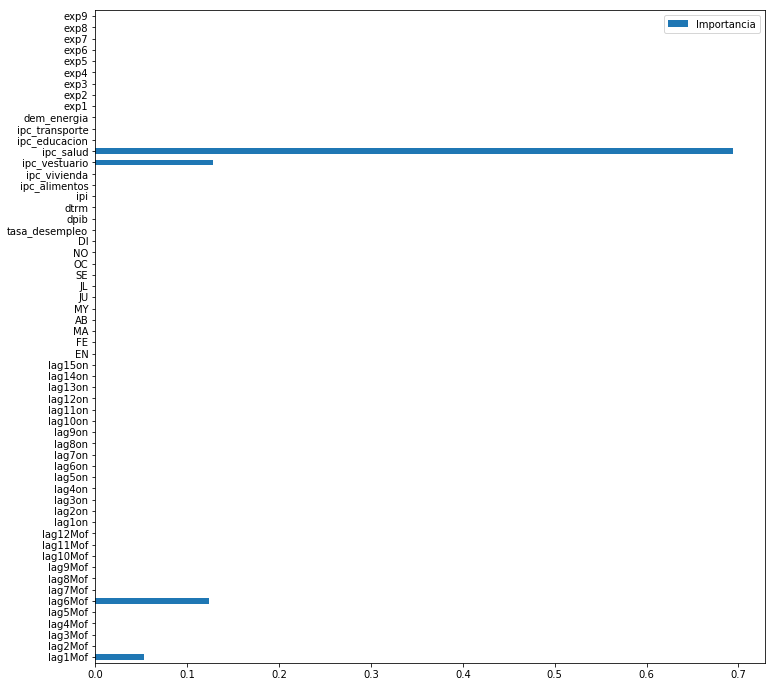

In [37]:
# Visualización de la importancia
importancia_arbol.plot(kind='barh', figsize=(12,12))

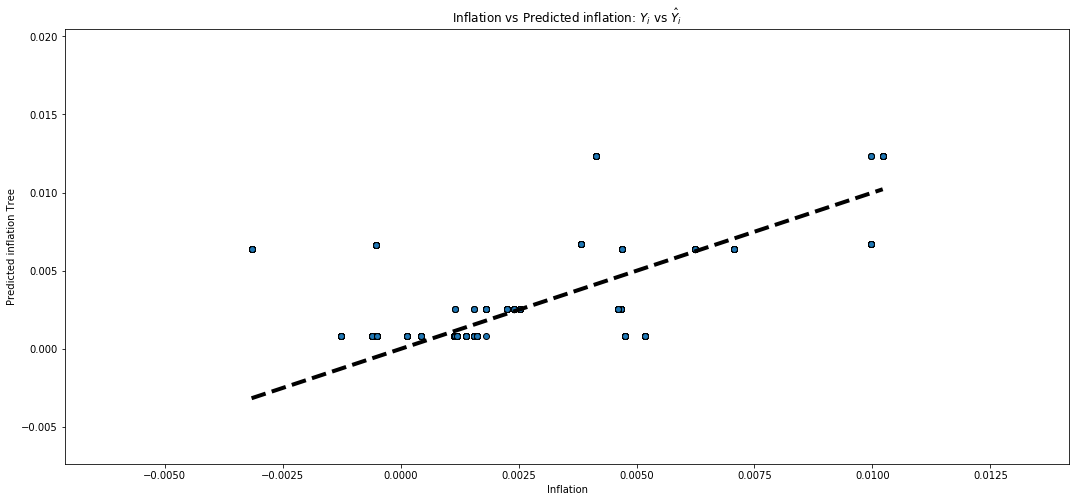

In [38]:
#plot 
fig, ax = plt.subplots()
ax.scatter(Y_test12_va, y_pred_treer, edgecolors=(0, 0, 0))
ax.plot([Y_test12_va.min(), Y_test12_va.max()], [Y_test12_va.min(), Y_test12_va.max()], 'k--', lw=4)
ax.set_xlabel('Inflation')
ax.set_ylabel('Predicted inflation Tree')
ax.set_title("Inflation vs Predicted inflation: $Y_i$ vs $\hat{Y}_i$")
plt.show()

### Random forest

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_predict

In [40]:
# Modelo random forest

## Selección de parámetros Random Forest
parameters = {
    "max_depth":[3,4,5,6],
    "max_features":["sqrt",10,20,30,40,50],
    "n_estimators":[10,50,100]
    }

%time
# Construyo el objeto que hace validacion cruzada con búsqueda de parámetros y lo estimo
grid_rf=GridSearchCV(RandomForestRegressor(), parameters, cv=5)
grid_rf.fit(X_train12_va, Y_train12_va)
best_rf=grid_rf.best_estimator_
best_rf.get_params

# predicting test data
y_pred_rfr = grid_rf.predict(X_test12_va) 

Wall time: 0 ns


In [41]:
print('Best estimator: {}'.format(grid_rf.best_estimator_))

Best estimator: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


In [42]:
# Creamos un dataframe con las importancias
importancia_rf=pd.DataFrame(best_rf.feature_importances_, index=X_train12_va.columns, columns=['Importancia'])

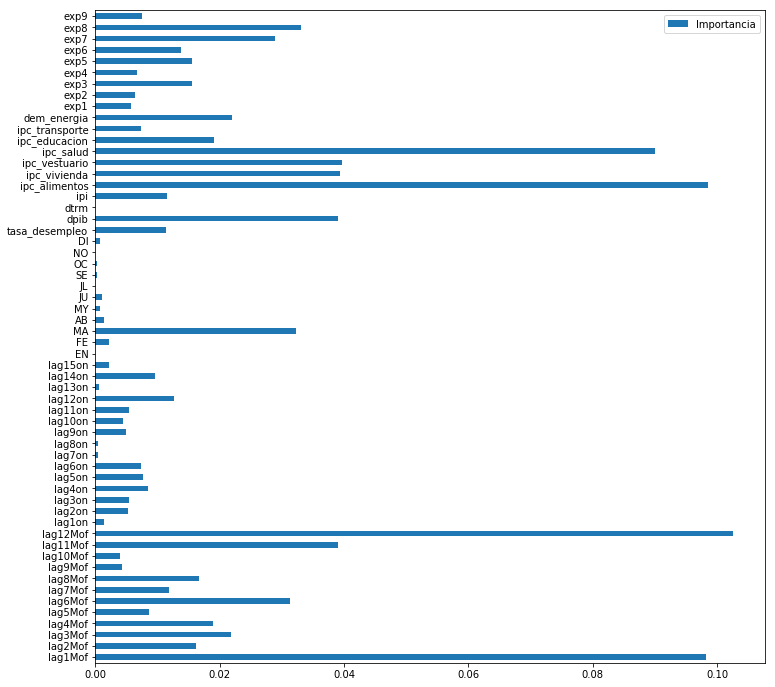

In [43]:
# Visualización de la importancia
importancia_rf.plot(kind='barh', figsize=(12,12))

In [44]:
model_score_rf = grid_rf.score(X_train12_va,Y_train12_va)
# R2
print('R^2 predicción: ',model_score_rf)
# The mean squared error
print("RMSE: %.8f"% math.sqrt(mean_squared_error(Y_test12_va, y_pred_rfr)))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.6f' % r2_score(Y_test12_va, y_pred_rfr))

R^2 predicción:  0.9715735211364274
RMSE: 0.00239735
Test Variance score: 0.367003


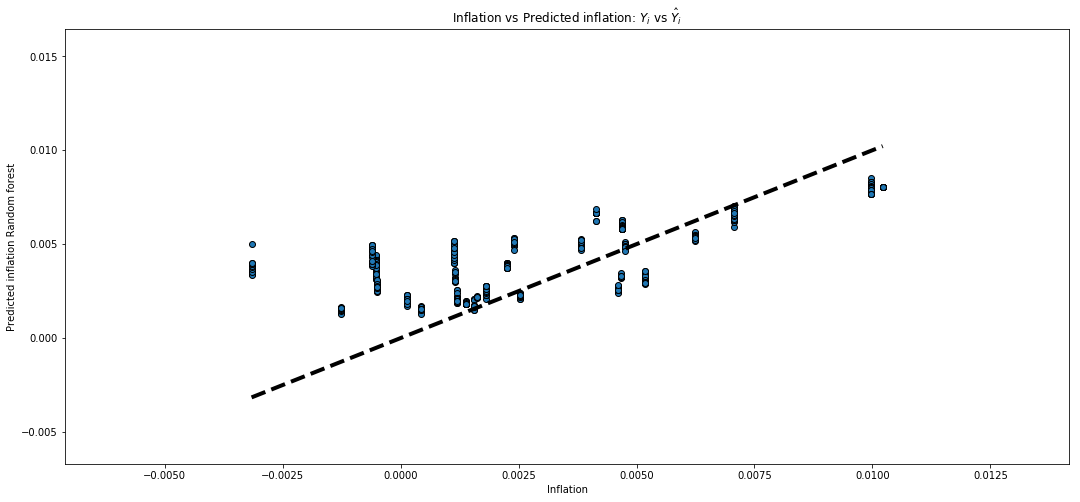

In [45]:
# plot
fig, ax = plt.subplots()
ax.scatter(Y_test12_va, y_pred_rfr, edgecolors=(0, 0, 0))
ax.plot([Y_test12_va.min(), Y_test12_va.max()], [Y_test12_va.min(), Y_test12_va.max()], 'k--', lw=4)
ax.set_xlabel('Inflation')
ax.set_ylabel('Predicted inflation Random forest')
ax.set_title("Inflation vs Predicted inflation: $Y_i$ vs $\hat{Y}_i$")
plt.show()

# Punto tres

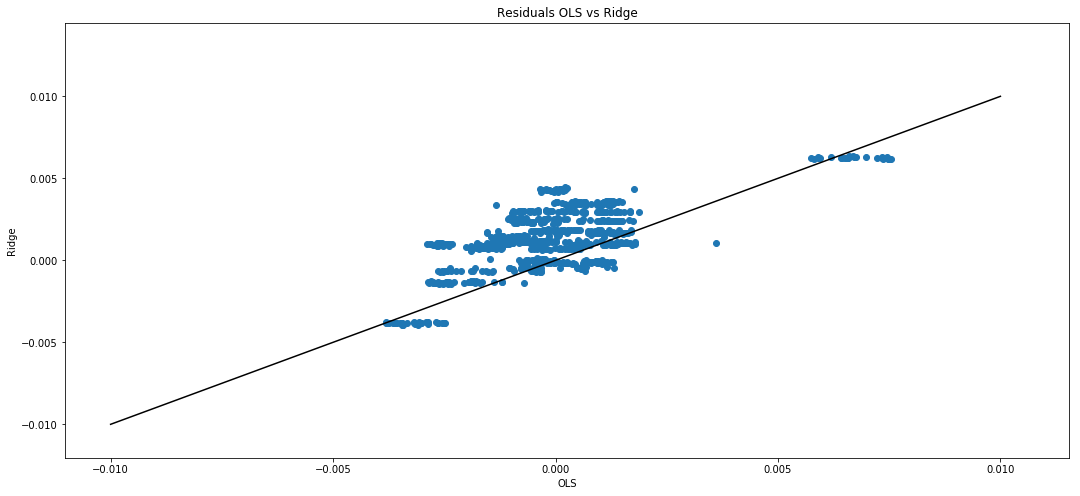

In [46]:
# Escogemos los mejores dos modelos:
# modelo ols con los primeros tres rezagos y modelo ridge
errorols   =  model1_pred.iloc[:913]  - Y_test1.iloc[:913]
errorridge =  Y_pred_ridge - Y_test12_va

# graficar
plt.scatter(errorols, errorridge)
plt.xlabel("OLS")
plt.ylabel("Ridge")
plt.title("Residuals OLS vs Ridge")
plt.plot([-0.010,0.010],[-0.010,0.010], color="black")
plt.show()